<a href="https://colab.research.google.com/github/bourama1/TH1zp/blob/main/TH1zp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zápočtový úkol 1 TH

In [1]:
!pip install smallworld

In [2]:
from smallworld.draw import draw_network
from smallworld import get_smallworld_graph
import networkx as nx
import matplotlib.pyplot as plt
import random

## Vytvořit modely sítě

In [3]:
def print_network_properties(G, ax):
    try:
        clustering_coefficient = nx.average_clustering(G)
        average_shortest_path_length = nx.average_shortest_path_length(G)
        text = f"Clustering koeficient: {clustering_coefficient:.2f}\nPrůměrná vzdálenost: {average_shortest_path_length:.2f}"
    except nx.NetworkXError as e:
        text = "Graf není spojený, nelze vypočítat průměrnou vzdálenost."
    ax.text(0.5, 0, text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=8)

# Definice parametrů sítě
###   LZE MĚNIT
###   N udává počet uzlů
###   betas = Pravděpodobnost přepojení hrany v siti SMALL WORLD ONLY
###   p_edge = Pravděpodobnost existence hrany mezi uzly RANDOM NETWORK ONLY
N = 31
betas = [0, 0.02, 0.04] # vice hodnot Beta pouze pro vizualizaci prepojovani, ulozena vzdy posledni sit
p_edge = 0.1

### Síť malého světa

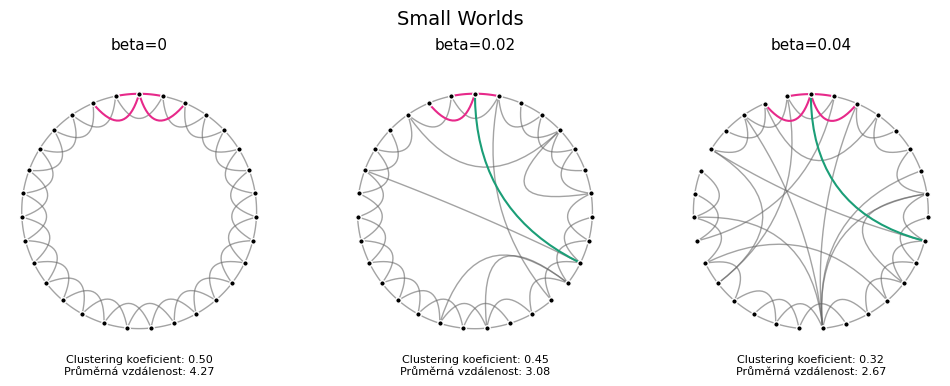

In [10]:
labels = [f"beta={beta}" for beta in betas]
focal_node = 0
SW = 0

# Vytvoření subplotů dle počtu hodnot betas
fig, ax = plt.subplots(1, len(betas), figsize=(len(betas)*4, 4))

# Procházení jednotlivých hodnot betas a jejich zobrazení
for ib, beta in enumerate(betas):
    # Vytvoření a vykreslení sítě
    SW = get_smallworld_graph(N, 2, beta)
    draw_network(SW, 2, focal_node=focal_node, ax=ax[ib])
    ax[ib].set_title(labels[ib], fontsize=11)

    # Výpočet a výpis vlastností sítě pod graf
    print_network_properties(SW, ax[ib])

# Přidání nadpisu nad všechny grafy
plt.suptitle("Small Worlds", fontsize=14, y=1)

# Zobrazení
plt.subplots_adjust(wspace=0.3)
plt.show()

### Síť s preferenčním připojováním

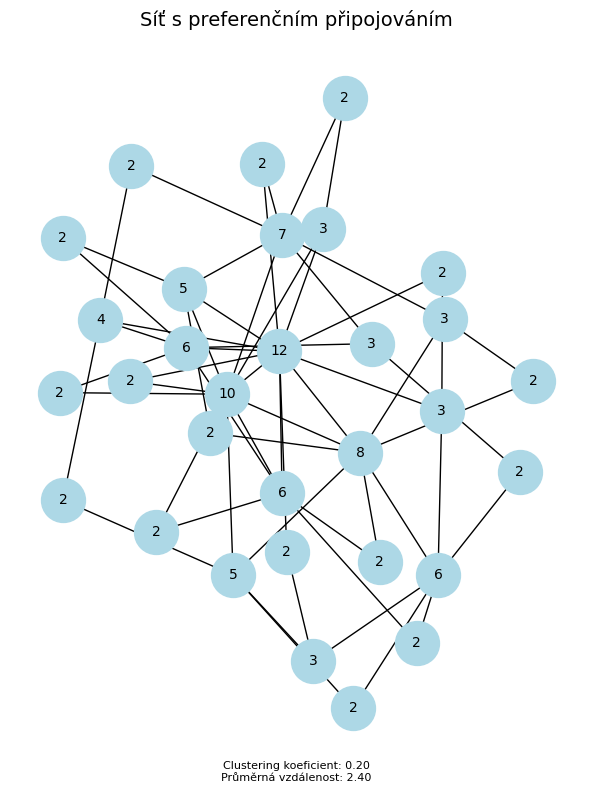

In [5]:
PA = nx.barabasi_albert_graph(N, 2)  # 31 uzlů, každý nový uzel se připojí k existujícím uzlům s pravděpodobností, která je úměrná jejich stupni

# Úprava popisu uzlů v grafu na jejich stupeň
node_labels = {node: PA.degree(node) for node in PA.nodes()}

# Vykreslení sítě s upravenými popisky uzlů a vypis hodnot sítě
fig, ax = plt.subplots(figsize=(6, 8))

# Vykreslení sítě s upravenými popisky uzlů
pos = nx.spring_layout(PA)
nx.draw(PA, pos, with_labels=True, labels=node_labels, node_color='lightblue', node_size=1000, font_size=10, ax=ax)
ax.set_title("Síť s preferenčním připojováním", fontsize=14, y=1)

# Výpis a výpočet vlastností sítě
print_network_properties(PA, ax)

# Zobrazení grafu
plt.tight_layout()
plt.show()

### Náhodná síť

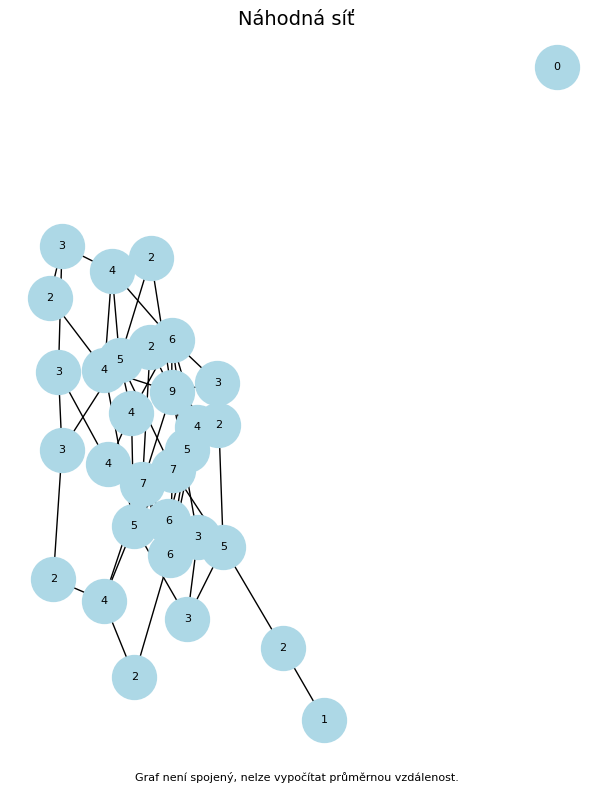

In [6]:
# Generování náhodné sítě
RN = nx.erdos_renyi_graph(N, p_edge)

# Úprava popisu uzlů v grafu na jejich stupeň
node_labels = {node: RN.degree(node) for node in RN.nodes()}

# Vykreslení sítě s upravenými popisky uzlů a výpis hodnot sítě
fig, ax = plt.subplots(figsize=(6, 8))

# Vykreslení sítě s upravenými popisky uzlů
pos = nx.spring_layout(RN)
nx.draw(RN, pos, with_labels=True, labels=node_labels, node_color='lightblue', node_size=1000, font_size=8, ax=ax)
ax.set_title("Náhodná síť", fontsize=14, y=1)

# Výpis a výpočet vlastností sítě
print_network_properties(RN, ax)

# Zobrazení grafu
plt.tight_layout()
plt.show()

## Hra kámen nůžky papír

In [11]:
# Funkce pro hru kámen-nůžky-papír
def rock_paper_scissors(player1, player2):
    if player1 == player2:
        return "Remíza"
    elif (player1 == "kámen" and player2 == "nůžky") or \
         (player1 == "nůžky" and player2 == "papír") or \
         (player1 == "papír" and player2 == "kámen"):
        return "Hráč 1 vyhrál!"
    else:
        return "Hráč 2 vyhrál!"

# Hra kámen-nůžky-papír na základě spojení v grafu
def play_rock_paper_scissors(G):
    results = {"Hráč 1 vyhrál!": 0, "Hráč 2 vyhrál!": 0, "Remíza": 0}  # Inicializace slovníku pro ukládání výsledků
    for edge in G.edges():
        player1 = random.choice(["kámen", "nůžky", "papír"])
        player2 = random.choice(["kámen", "nůžky", "papír"])
        result = rock_paper_scissors(player1, player2)
        results[result] += 1  # Inkrementuj počet výsledků pro daný výsledek
    return results  # Vrať slovník s výsledky

# Spusť hru na obou sitich a získej výsledky
resultsSW = play_rock_paper_scissors(SW)
resultsPA = play_rock_paper_scissors(PA)
resultsRN = play_rock_paper_scissors(RN)

## Vizualizace výsledků

In [12]:
def visualize_results(results, G):
  # Seznam možných voleb
  choices = list(results.keys())

  # Počty výher pro každou možnou volbu
  wins = [results[choice] for choice in choices]

  # Vykreslení grafu
  plt.bar(choices, wins, color=['red', 'green', 'blue'])
  plt.xlabel('Volba')
  plt.ylabel('Počet výher')
  plt.title('Výsledky hry kámen-nůžky-papír')
  plt.show()

  print(G)
  print("Celkové výsledky hry:", results)

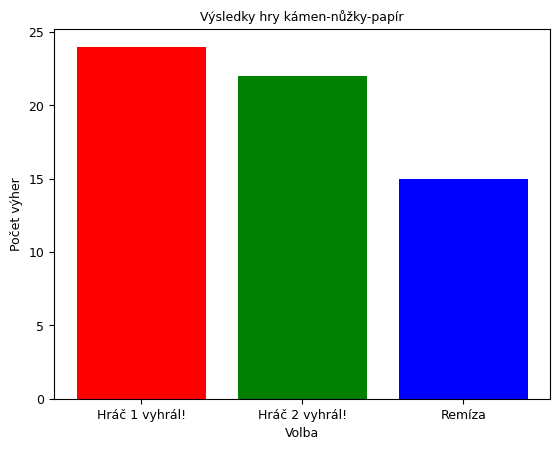

Graph with 31 nodes and 61 edges
Celkové výsledky hry: {'Hráč 1 vyhrál!': 24, 'Hráč 2 vyhrál!': 22, 'Remíza': 15}


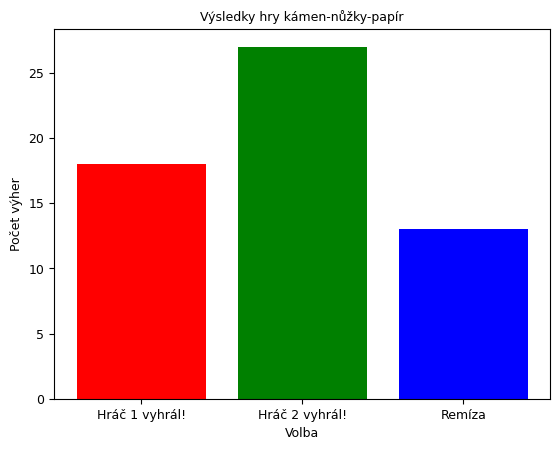

Graph with 31 nodes and 58 edges
Celkové výsledky hry: {'Hráč 1 vyhrál!': 18, 'Hráč 2 vyhrál!': 27, 'Remíza': 13}


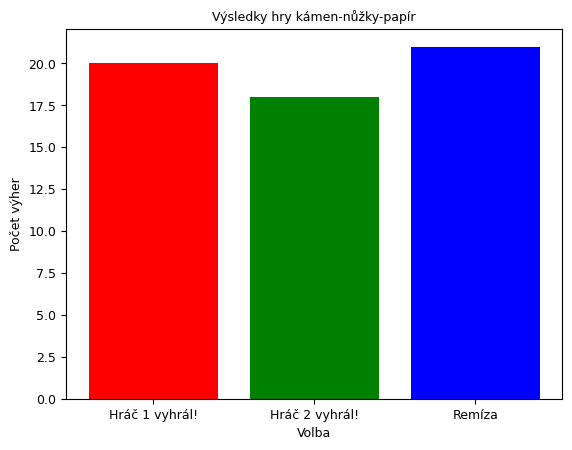

Graph with 31 nodes and 59 edges
Celkové výsledky hry: {'Hráč 1 vyhrál!': 20, 'Hráč 2 vyhrál!': 18, 'Remíza': 21}


In [13]:
visualize_results(resultsSW, SW)
visualize_results(resultsPA, PA)
visualize_results(resultsRN, RN)

## Zdroje
* knihovna pro síť Small World: https://github.com/benmaier/smallworld
*